In [1]:
import pandas as pd
from loadmodules import *

In [2]:
import shutil
src = '/home/lgvanover/intro_scripts/satellite_utilities.py'
dst =  '/home/lgvanover/arepo-snap-util/satellite_utilities.py'
shutil.copyfile(src, dst)
import satellite_utilities as sat

ModuleNotFoundError: No module named 'satellite_utilities'

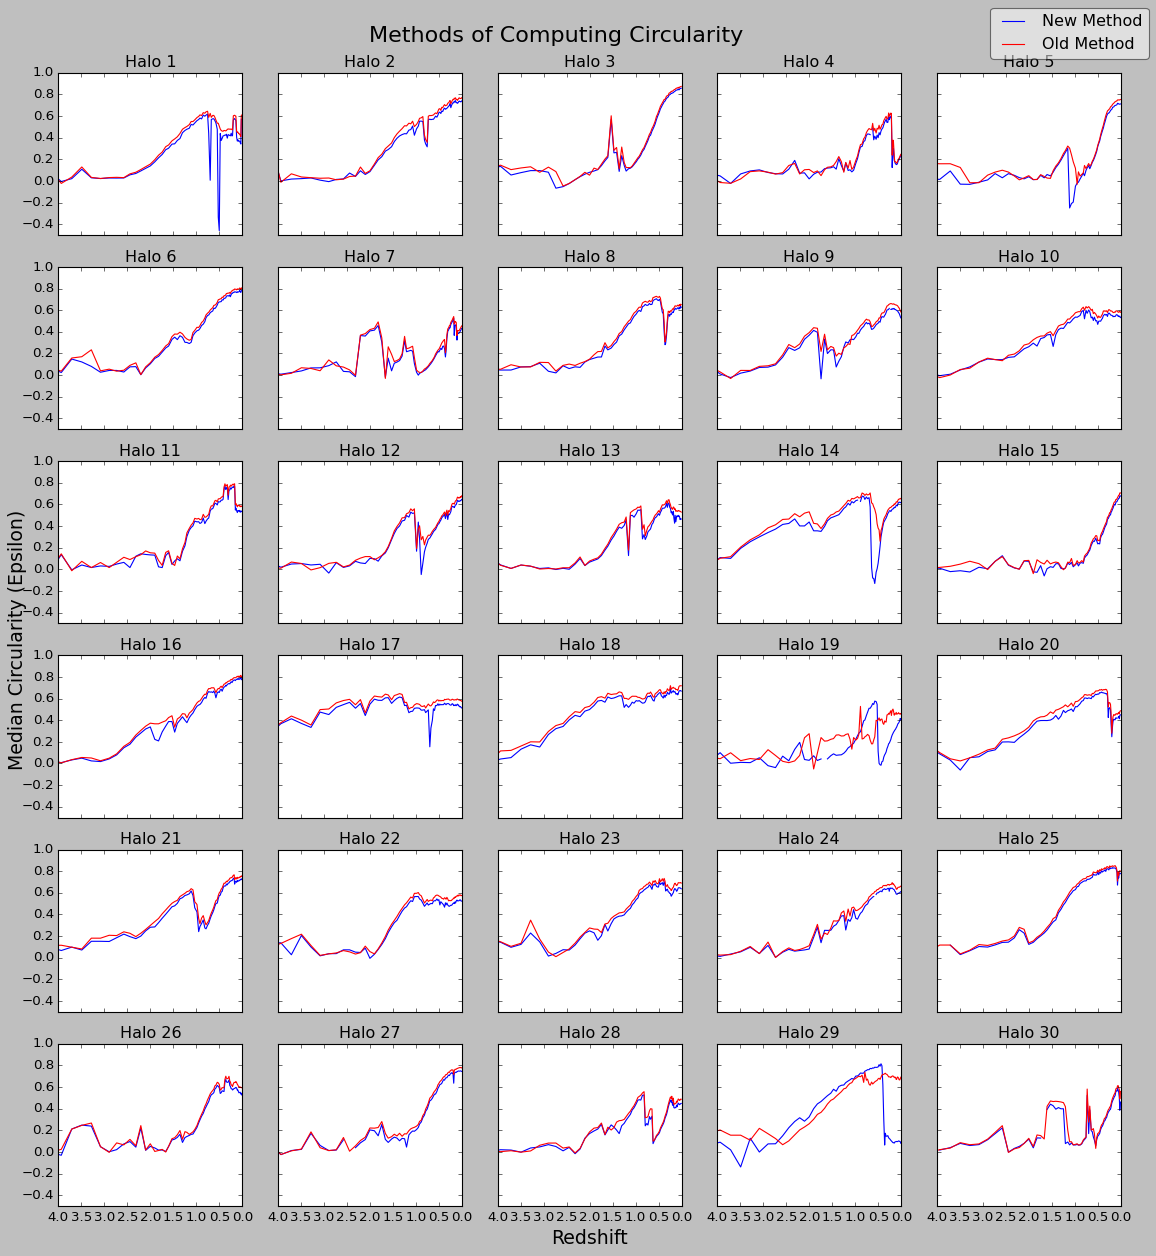

In [8]:
#All Halos Subplot med eps of level 4 w new calculation method
#over redshift

fig, axs = plt.subplots(6,5, figsize=(15, 16),sharex=True,sharey=True)
fig.subplots_adjust(hspace = .2, wspace=.1)
plt.ylim(-.5,1)
plt.xlim(4,0)

axs = axs.ravel()

for x in np.arange(1,31):

    path = '/home/lgvanover/intro_scripts/halos/new/level4_halo'+str(x)+'.hdf5'

    df_new = pd.read_hdf(path, "table")
        
    axs[x-1].plot(df_new['Redshift'],df_new['Median Epsilon'],label='New Method')
    # axs[x-1].plot(df_new['Redshift'][8::],df_new['Disk_Ratio'][8::],label='Disk Ratio')
    axs[x-1].set_title("Halo "+str(x))

    pathold = '/home/lgvanover/intro_scripts/halos/level4/halo_'+str(x)+'.hdf5'

    df_old = pd.read_hdf(pathold, "table")
        
    axs[x-1].plot(df_old['Redshift'], df_old['Med_Eps'],'r',label='Old Method')

    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
plt.ylabel("Median Circularity (Epsilon)", fontsize=17)
fig.suptitle("Methods of Computing Circularity", fontsize=20)
fig.tight_layout()


In [16]:
import satellite_utilities as sat

ModuleNotFoundError: No module named 'satellite_utilities'

   Snapshot   Redshift  Median Epsilon  Disk Ratio  Lookback Time
0        30  10.919033       -0.058158   -0.166471      13.407843
1        31  10.367444       -0.078811   -0.211413      13.376768
2        32   9.841380       -0.054667   -0.136080      13.343409
3        33   9.388771       -0.000483   -0.003087      13.311292
4        34   8.907999        0.041292    0.251856      13.273119


NameError: name 'sat' is not defined

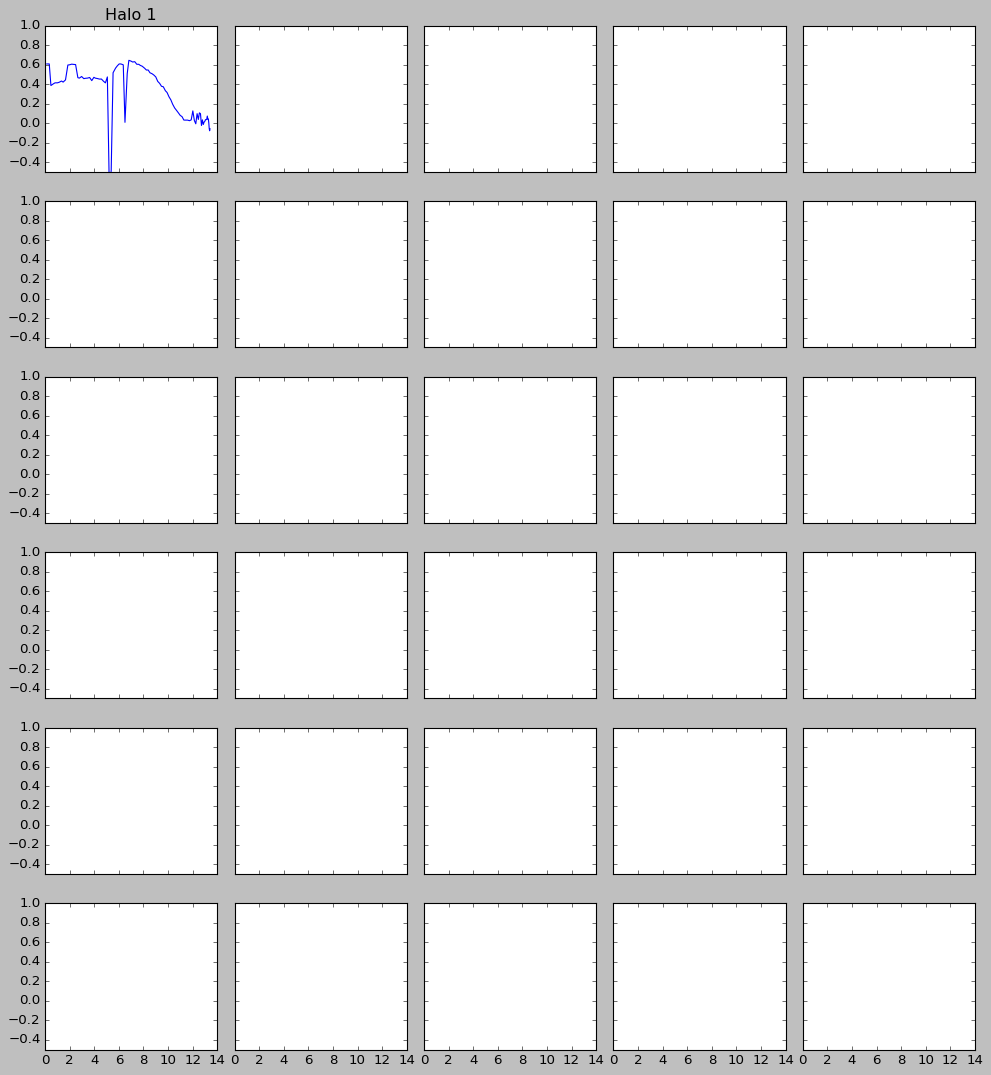

In [22]:
#All Halos Subplot med eps of level 4 w new calculation method
#over gyrs

fig, axs = plt.subplots(6,5, figsize=(15, 16),sharex=True,sharey=True)
fig.subplots_adjust(hspace = .2, wspace=.1)
plt.ylim(-.5,1)
# plt.xlim(4,0)

axs = axs.ravel()

for x in np.arange(1,31):

    # path = '/home/lgvanover/intro_scripts/halos/new/level4_halo'+str(x)+'.hdf5'

    # df_new = pd.read_hdf(path, "table")

    path = '/home/lgvanover/intro_scripts/halos/new/level4_halo'+str(x)+'.hdf5'
    df_new = pd.read_hdf(path, 'table')
        
    axs[x-1].plot(df_new['Lookback Time'],df_new['Median Epsilon'],label='New Method')
    # axs[x-1].plot(df_new['Redshift'][8::],df_new['Disk_Ratio'][8::],label='Disk Ratio')
    axs[x-1].set_title("Halo "+str(x))

    pathold = '/home/lgvanover/intro_scripts/halos/level4/halo_'+str(x)+'.hdf5'

    df_old = pd.read_hdf(pathold, "table")
    z = df_old['Redshift']
    lookbacktimes = sat.return_lookbacktime_from_a((z+1.0)**(-1.0))
        
    axs[x-1].plot(lookbacktimes, df_old['Med_Eps'],'r',label='Old Method')

    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Lookback Time (Gyrs)", fontsize=17)
plt.ylabel("Median Circularity (Epsilon)", fontsize=17)
fig.suptitle("Methods of Computing Circularity", fontsize=20)
fig.tight_layout()


Text(0.5, 1.0, 'Distribution of Eps = .5')

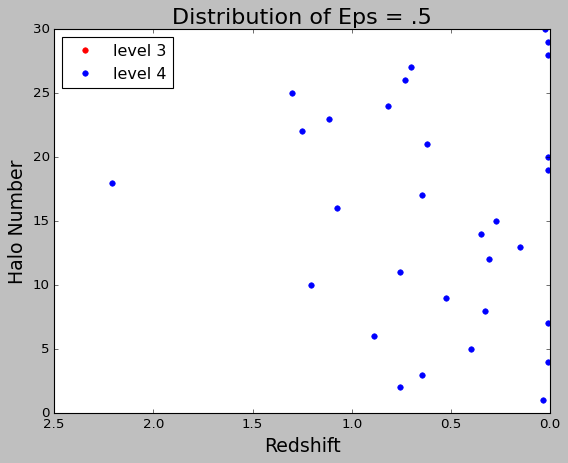

In [63]:
# circularity distribution time of .5

level3pt5 = []
level3pt5gyr = []
level3pt5snap = []
level4pt5 = []
level4pt5snap = []
level4pt5gyr = []
halos3 = []
halos4 = []

for x in range(1,31):
    path4 = '/home/lgvanover/intro_scripts/halos/new/level4_halo'+str(x)+'.hdf5'
    
    df_4 = pd.read_hdf(path4, "table")
    half4, = np.where(df_4['Median Epsilon']<.5)

    # z4 = df_4['Redshift']
    # lookbacktimes4 = sat.return_lookbacktime_from_a((z4+1.0)**(-1.0))
    # level4pt5gyr.append(lookbacktimes4[half4[-1]])
    idx4 = df_4.iloc[[half4[-1]]]


    level4pt5.append(idx4['Redshift'].values[0])
    halos4.append(x)
    level4pt5gyr.append(idx4['Lookback Time'].values[0])
    level4pt5snap.append(idx4['Snapshot'].values[0])

    # plt.plot(df_4["Redshift"][half4[-1]], x, 'b.', markersize=10, label="level 4")

    path3 = '/home/lgvanover/intro_scripts/halos/new/halo_'+str(x)+'_level3.hdf5'
    if os.path.exists(path3):
        df_3 = pd.read_hdf(path3, "table")
        half3, = np.where(df_3['Med_Eps']<.5)

        idx3 = df_3.iloc[[half3[-1]]]

        level4pt5.append(idx3['Redshift'].values[0])
        halos4.append(x)
        level4pt5gyr.append(idx3['Lookback Time'].values[0])
        level4pt5snap.append(idx3['SNapshot'].values[0])
        # plt.plot(df_3["Redshift"][half3[-1]], x, 'r.', markersize=10, label="level 3")

plt.plot(level3pt5, halos3, 'r.', markersize=10, label='level 3')
plt.plot(level4pt5, halos4, 'b.', markersize=10, label='level 4')

plt.xlabel("Redshift", fontsize=17)
plt.ylabel("Halo Number", fontsize=17)
plt.xlim(2.5, 0)
plt.legend(loc=0, numpoints=1)
plt.title("Distribution of Eps = .5", fontsize=20)

Text(0.5, 1.0, 'Distribution of Eps = .3')

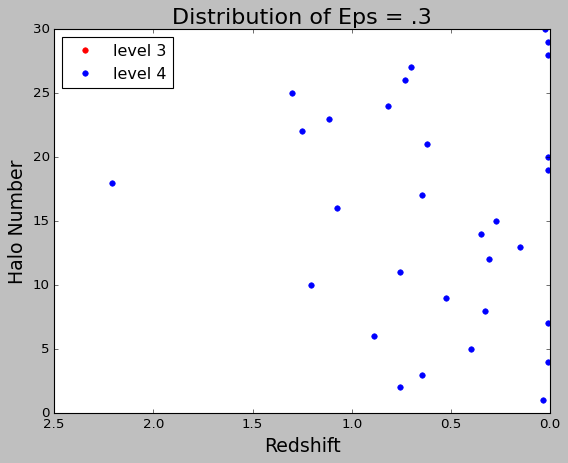

In [67]:
# circularity distribution time of .3

level3pt3 = []
level3pt3gyr = []
level3pt3snap = []
level4pt3 = []
level4pt3snap = []
level4pt3gyr = []
halos3 = []
halos4 = []

for x in range(1,31):
    path4 = '/home/lgvanover/intro_scripts/halos/new/level4_halo'+str(x)+'.hdf5'
    
    df_4 = pd.read_hdf(path4, "table")
    half4, = np.where(df_4['Median Epsilon']<.3)

    # z4 = df_4['Redshift']
    # lookbacktimes4 = sat.return_lookbacktime_from_a((z4+1.0)**(-1.0))
    # level4pt5gyr.append(lookbacktimes4[half4[-1]])
    idx4 = df_4.iloc[[half4[-1]]]


    level4pt3.append(idx4['Redshift'].values[0])
    halos4.append(x)
    level4pt3gyr.append(idx4['Lookback Time'].values[0])
    level4pt3snap.append(idx4['Snapshot'].values[0])

    # plt.plot(df_4["Redshift"][half4[-1]], x, 'b.', markersize=10, label="level 4")

    path3 = '/home/lgvanover/intro_scripts/halos/new/halo_'+str(x)+'_level3.hdf5'
    if os.path.exists(path3):
        df_3 = pd.read_hdf(path3, "table")
        half3, = np.where(df_3['Med_Eps']<.3)

        idx3 = df_3.iloc[[half3[-1]]]

        level4pt3.append(idx3['Redshift'].values[0])
        halos4.append(x)
        level4pt3gyr.append(idx3['Lookback Time'].values[0])
        level4pt3snap.append(idx3['SNapshot'].values[0])
        # plt.plot(df_3["Redshift"][half3[-1]], x, 'r.', markersize=10, label="level 3")

plt.plot(level3pt5, halos3, 'r.', markersize=10, label='level 3')
plt.plot(level4pt5, halos4, 'b.', markersize=10, label='level 4')

plt.xlabel("Redshift", fontsize=17)
plt.ylabel("Halo Number", fontsize=17)
plt.xlim(2.5, 0)
plt.legend(loc=0, numpoints=1)
plt.title("Distribution of Eps = .3", fontsize=20)

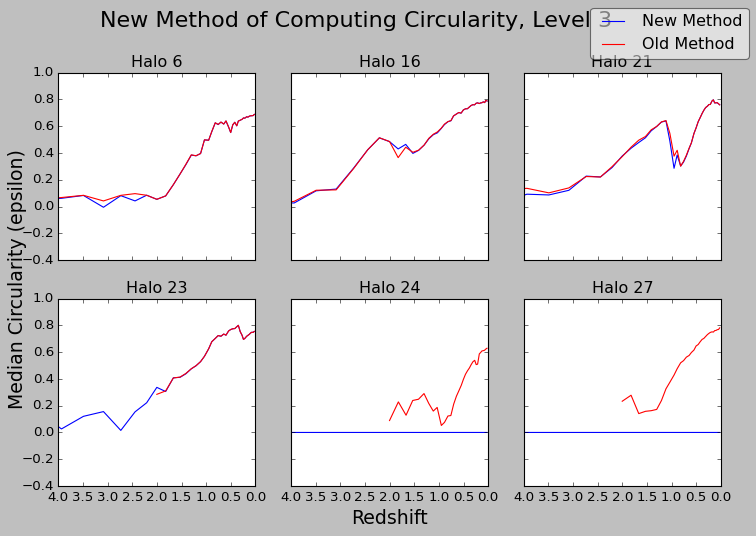

In [20]:
#All Halos Subplot med eps of level 3 w new calculation method
#over redshift
halos_level_3 = [6, 16, 21, 23, 24, 27]

fig, axs = plt.subplots(2,3, figsize=(10,7),sharex=True,sharey=True)

fig.subplots_adjust(hspace = .2, wspace=.1)
plt.ylim(-.4,1)
plt.xlim(4,0)

axs = axs.ravel()

for i,x in enumerate(halos_level_3):

    path = '/home/lgvanover/intro_scripts/halos/new/level3_halo'+str(x)+'.hdf5'

    df_new = pd.read_hdf(path, "table")

    old_path = '/home/lgvanover/intro_scripts/halos/level3/halo_'+str(x)+'_level3.hdf5'
    df_old = pd.read_hdf(old_path, 'table')
        
    axs[i].plot(df_new['Redshift'],df_new['Median Epsilon'],'b',label='New Method')
    axs[i].plot(df_old['Redshift'],df_old['Med_Eps'],'r',label='Old Method')
    # axs[x-1].plot(df_new['Redshift'][8::],df_new['Disk_Ratio'][8::],label='Disk Ratio')
    axs[i].set_title("Halo "+str(x))

    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
plt.ylabel("Median Circularity (epsilon)", fontsize=17)
fig.suptitle("New Method of Computing Circularity, Level 3", fontsize=20)
fig.tight_layout()


In [14]:
path = '/home/lgvanover/intro_scripts/halos/new/level3_halo16.hdf5'
df = pd.read_hdf(path, "table")

In [18]:
old_path = '/home/lgvanover/intro_scripts/halos/level3/halo_6_level3.hdf5'
pd.read_hdf(old_path, 'table')

,Redshift,Med_Eps,Disk_Ratio,Med_SMass,Med_Velocity,Med_Position
0,6.144901,0.055266,0.119853,6.053684e-07,-7.426742,2.637126e-05
1,5.529766,0.004815,0.018765,5.864359e-07,-3.178945,-3.542790e-06
2,4.939381,0.079243,0.180326,5.833676e-07,-2.636793,2.139290e-05
3,4.428034,0.054036,0.113885,5.550208e-07,-0.784371,-1.121065e-06
4,3.937261,0.067538,0.134239,5.459032e-07,-2.653621,-9.519823e-07
5,3.490861,0.084104,0.185511,5.455660e-07,-4.283832,1.473147e-05
6,3.084823,0.042140,0.105149,5.420712e-07,-5.981024,-7.366180e-05
7,2.733143,0.083834,0.204738,5.218262e-07,-0.964390,-5.336989e-05
8,2.444226,0.096705,0.242364,5.119711e-07,0.890986,2.057961e-05
9,2.207925,0.084502,0.213610,5.054445e-07,-8.524693,-9.113452e-06
